## Introduction to Machine Learning 
# Assignment 2 - Classification and model comparison
Your name: Cas Carree

Your Student number: U552548


In [ ]:
#references: https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

### Import the data, split the test portion

In [1]:
import pandas as pd
df = pd.read_csv('IML_S2024_data.csv')
print(df.tail())

        Visitor Month  Area  Time_off  Occasion  Operational  \
10738  Existing   Nov     1         0       0.0            0   
10739  Existing   Dec     1         1       0.0            3   
10740  Existing   Nov     1         1       0.0            0   
10741  Existing   Nov     1         1       0.0            0   
10742       New   Nov     1         1       0.0            0   

       Operational_time  Content_info  Content_info_time  ProductRelated  \
10738               0.0             1                0.0              16   
10739             145.0             0                0.0              53   
10740               0.0             0                0.0               5   
10741               0.0             0                0.0               6   
10742               0.0             0                0.0               3   

       ProductRelated_Duration  System  WebBrowser  TrafficType  PageValues  \
10738               503.000000       2           2            1    0.000000   


In [2]:
data_types = df.dtypes
print(data_types)

Visitor                           object
Month                             object
Area                               int64
Time_off                           int64
Occasion                         float64
Operational                        int64
Operational_time                 float64
Content_info                       int64
Content_info_time                float64
ProductRelated                     int64
ProductRelated_Duration          float64
System                             int64
WebBrowser                         int64
TrafficType                        int64
PageValues                       float64
effectiveness_of_landing_page    float64
likelihood_of_Exit               float64
Success                            int64
dtype: object


Given the data types, the month and the visitor type will be encoded below:

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Month_encoded'] = label_encoder.fit_transform(df['Month'])
df_dropped = df.drop(columns=['Month'])
df=df_dropped
df.rename(columns={"Month_encoded": "Month"}, inplace=True)
df = df.reset_index(drop=True)
#df.info()

In [4]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_feature = encoder.fit_transform(df[['Visitor']])
encoded_df = pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out(['Visitor']))
df_encoded = pd.concat([df, encoded_df], axis=1)
df_dropped = df_encoded.drop(columns=['Visitor'])
df=df_dropped
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10743 entries, 0 to 10742
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           10743 non-null  int64  
 1   Time_off                       10743 non-null  int64  
 2   Occasion                       10743 non-null  float64
 3   Operational                    10743 non-null  int64  
 4   Operational_time               10743 non-null  float64
 5   Content_info                   10743 non-null  int64  
 6   Content_info_time              10743 non-null  float64
 7   ProductRelated                 10743 non-null  int64  
 8   ProductRelated_Duration        10743 non-null  float64
 9   System                         10743 non-null  int64  
 10  WebBrowser                     10743 non-null  int64  
 11  TrafficType                    10743 non-null  int64  
 12  PageValues                     10743 non-null 

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
y = df['Success']
X = df.drop('Success', axis=1)

numerical_cols = [
     'Occasion', 'Operational_time', 'Content_info_time', 
    'ProductRelated_Duration', 'PageValues', 'effectiveness_of_landing_page', 
    'likelihood_of_Exit','Area', 'Time_off', 'Operational', 'Content_info', 
                           'ProductRelated', 'System', 'WebBrowser', 
                           'TrafficType', 'Month'
]

# Separate numerical features
X_numerical = X[numerical_cols]

# Standardize numerical features
scaler = StandardScaler()
X_numerical_standardized = scaler.fit_transform(X_numerical)

# Convert the standardized numerical features back to a DataFrame
X_numerical_standardized = pd.DataFrame(X_numerical_standardized, columns=numerical_cols)

# Combine standardized numerical features with the rest of the features
X_non_numerical = X.drop(columns=numerical_cols)
X_processed = pd.concat([X_numerical_standardized, X_non_numerical.reset_index(drop=True)], axis=1)

print(X_processed.head())

   Occasion  Operational_time  Content_info_time  ProductRelated_Duration  \
0 -0.308543         -0.462803          -0.247919                -0.624507   
1 -0.308543         -0.462803          -0.247919                -0.591488   
2 -0.308543         -0.462803          -0.247919                -0.624507   
3 -0.308543         -0.462803          -0.247919                -0.623131   
4 -0.308543         -0.462803          -0.247919                -0.300772   

   PageValues  effectiveness_of_landing_page  likelihood_of_Exit      Area  \
0   -0.333143                       3.749365            3.294445 -0.892915   
1   -0.333143                      -0.455639            1.202470 -0.892915   
2   -0.333143                       3.749365            3.294445  2.474381   
3   -0.333143                       0.595612            2.039260 -0.472003   
4   -0.333143                      -0.035138            0.156483 -0.892915   

   Time_off  Operational  Content_info  ProductRelated    System  We

In [6]:
# need to change this to balance the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

(8594, 18)
(2149, 18)


In [7]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(n_seeds_S=1000, random_state=42)
X_train_res, y_train_res = oss.fit_resample(X_train, y_train)
print(X_train_res.shape, y_train_res.shape)

(3946, 18) (3946,)


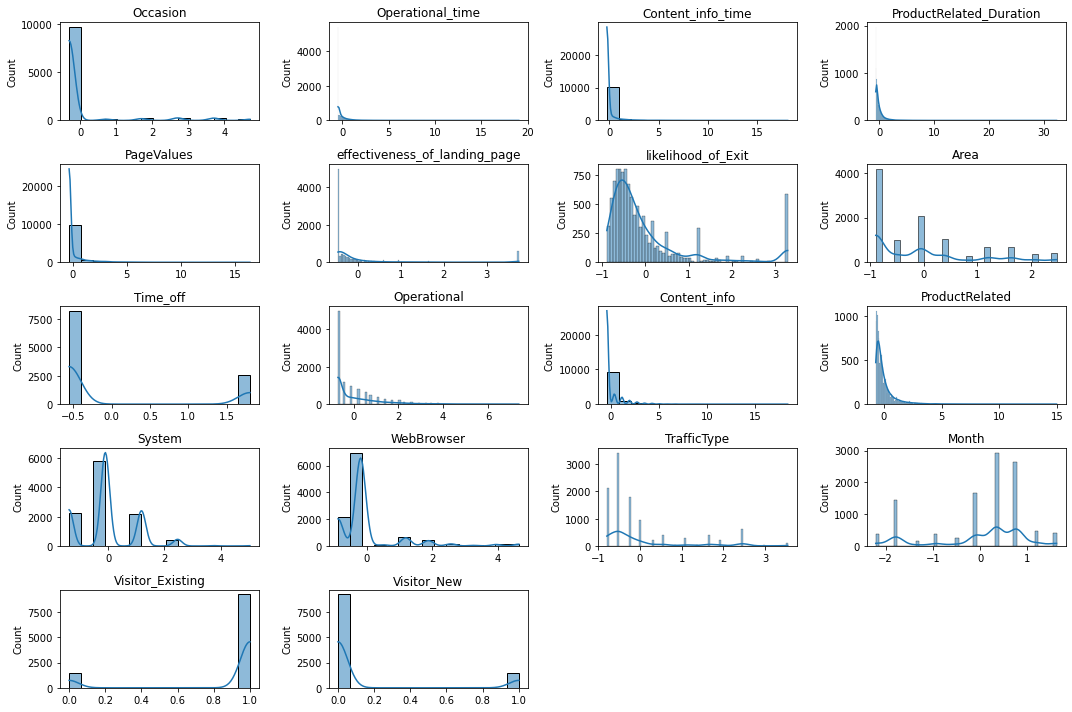

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Plot the distribution of each variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_processed.columns):  # Use the original DataFrame to get column names
    plt.subplot(5, 4, i+1)
    sns.histplot(X_processed[column], kde=True)  # Use the standardized values for plotting [:, i] for standerdized
    plt.title(column)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [9]:
tot_counts = y.value_counts(normalize=True) * 100
train_counts= y_train.value_counts(normalize=True) * 100
train_res_counts= y_train_res.value_counts(normalize=True)* 100
test_counts= y_test.value_counts(normalize=True) * 100
print('distribution of whole dataset is:{}'.format(tot_counts))
print('distribution of trainingset is:{}'.format(train_counts))
print('distribution of undersample trainingset is:{}'.format(train_res_counts))
print('distribution of testset is:{}'.format(test_counts))

distribution of whole dataset is:0    84.473611
1    15.526389
Name: Success, dtype: float64
distribution of trainingset is:0    84.477542
1    15.522458
Name: Success, dtype: float64
distribution of undersample trainingset is:0    66.193614
1    33.806386
Name: Success, dtype: float64
distribution of testset is:0    84.457887
1    15.542113
Name: Success, dtype: float64


## Section 1: Models

(Remove this text ->) Below,  we fit Gaussian naive bayes to our data for illustration purposes. Please do not use it for your assignment. Please do not use it for your assignment. This is a random choice, and we argue shortly why it may not be the best choice.
Naive Bayes classifiers are a family of classifiers that learn parameters by looking at each feature individually and collect simple per-class statistics from each feature. Gaussian Naive Bayes classifiers assume that features follow a normal distribution. Here, we have a mix of categorical and continous features.  GNB is  not ideal for a set of mixed features. Using it may make sense when most of the features are continious and have a normal distribution. Naive bayes also assumes independence across feautures. So, Gaussian naive bayes may not be the best option, let us see how it performs. Hint: we presented the accuracy score here. Is it the best choice for this data set? Why/why not? 


C:\Users\casca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\casca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\casca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\casca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters found:  {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score:  0.7752107298134154


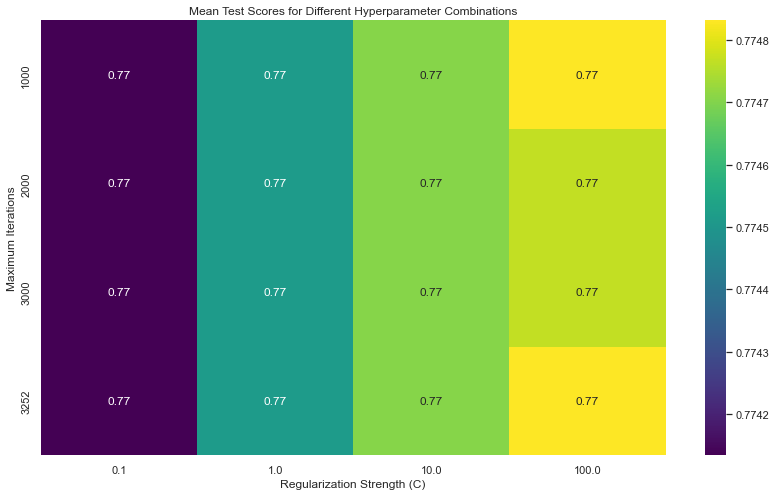

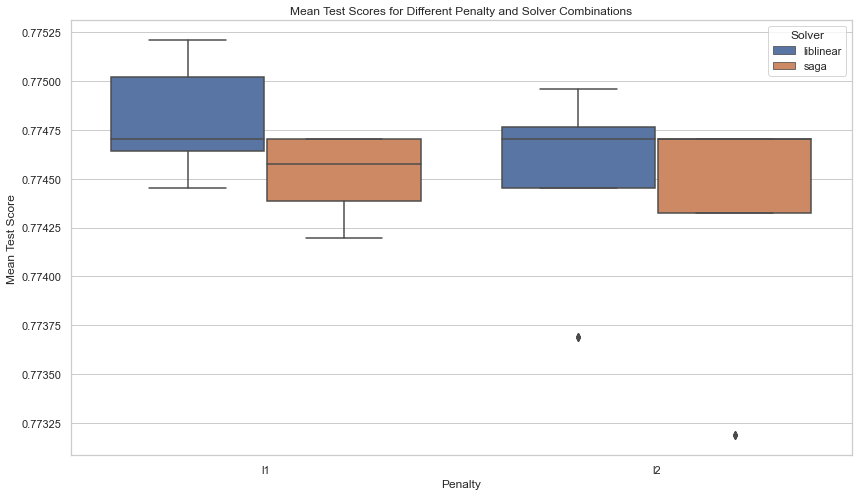

In [10]:
# seems to work only need to select which parameters to tune best seems to be 
# Best parameters found:  {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
# Best cross-validation score:  0.885336914437721
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

param_grid = {
    'C': [0.1, 1, 10, 100],           
    'penalty': ['l1', 'l2'],          
    'solver': ['liblinear', 'saga'],  
    'max_iter': [1000, 2000, 3000, 3252]       
}
grid_search = GridSearchCV(model, param_grid, cv= 5, scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Convert cv_results_ to a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Plotting
# Set up the seaborn style
sns.set(style="whitegrid")

# Plot the mean test scores for each combination of parameters
plt.figure(figsize=(14, 8))

# Convert mean test scores to heatmap
pivot_table = results.pivot_table(values='mean_test_score', index='param_max_iter', columns='param_C', aggfunc=np.mean)

sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Mean Test Scores for Different Hyperparameter Combinations')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Maximum Iterations')
plt.show()

# If you want to plot the impact of other hyperparameters like penalty and solver:
# Set up the seaborn style
sns.set(style="whitegrid")

# Example plot for penalty vs. solver
plt.figure(figsize=(14, 8))
sns.boxplot(x='param_penalty', y='mean_test_score', hue='param_solver', data=results)
plt.title('Mean Test Scores for Different Penalty and Solver Combinations')
plt.xlabel('Penalty')
plt.ylabel('Mean Test Score')
plt.legend(title='Solver')
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(C= 0.1, max_iter= 1000, penalty= 'l1', solver= 'liblinear')
model.fit(X_train_res, y_train_res)
print(model.score(X_train_res,y_train_res))
print(model.score(X_test,y_test))

0.7790167257982767
0.893438808748255


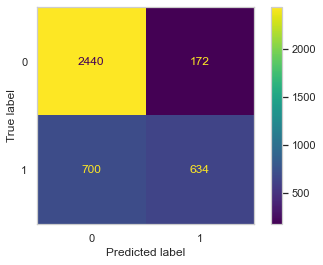

In [13]:
from sklearn import metrics
predicted = model.predict(X_train_res)
confusion_matrix = metrics.confusion_matrix(y_train_res, predicted)
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

fig, ax = plt.subplots()
cm_display2.plot(ax=ax)
ax.grid(False)
plt.show()

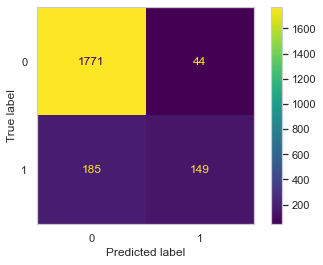

In [14]:
predicted3 = model.predict(X_test)
confusion_matrix3 = metrics.confusion_matrix(y_test, predicted3)
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [0, 1])

fig, ax = plt.subplots()
cm_display2.plot(ax=ax)
ax.grid(False)
plt.show()

In [15]:
F1_score_train = metrics.f1_score(y_train_res, predicted)
F1_score_test = metrics.f1_score(y_test, predicted3)
print(F1_score_train)
print(F1_score_test)

0.5925233644859813
0.5654648956356736


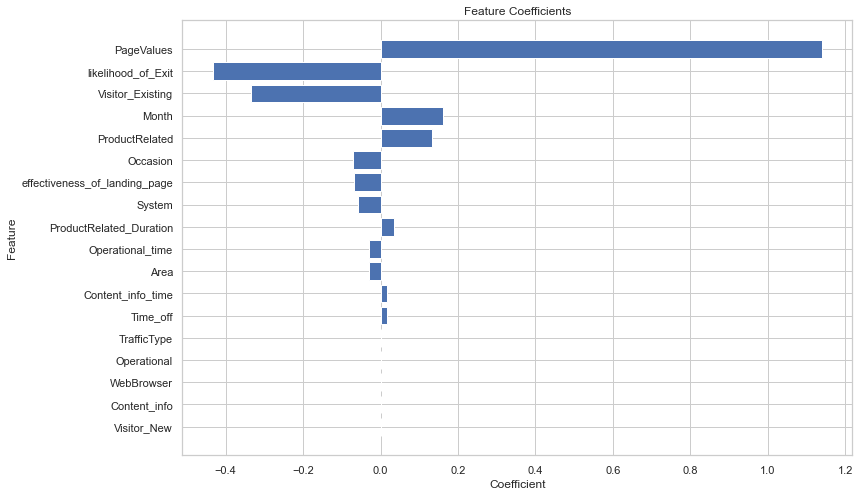

In [16]:
coefficients = model.coef_[0]

feature_names = X_train_res.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.gca().invert_yaxis()
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 250, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,  verbose=2)
grid_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_es

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 250, 500]},
             verbose=2)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.042737      0.011524         0.005194        0.004241   
1       0.177297      0.017889         0.008767        0.007397   
2       0.363510      0.024407         0.015012        0.003326   
3       0.951950      0.051988         0.039055        0.005894   
4       2.011364      0.121304         0.084598        0.005523   

  param_max_depth param_max_features param_min_samples_leaf  \
0            None               sqrt                      1   
1            None               sqrt                      1   
2            None               sqrt                      1   
3            None               sqrt                      1   
4            None               sqrt                      1   

  param_min_samples_split param_n_estimators  \
0                       2                 10   
1                       2                 50   
2                       2                100   
3                       2 

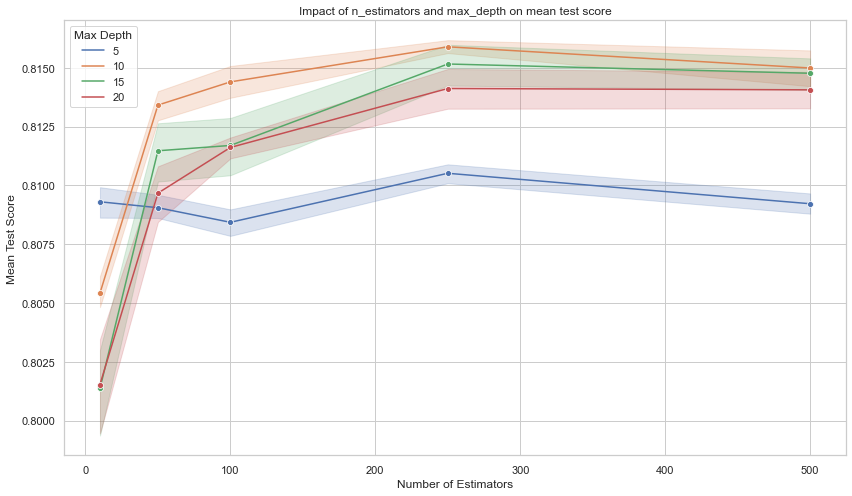

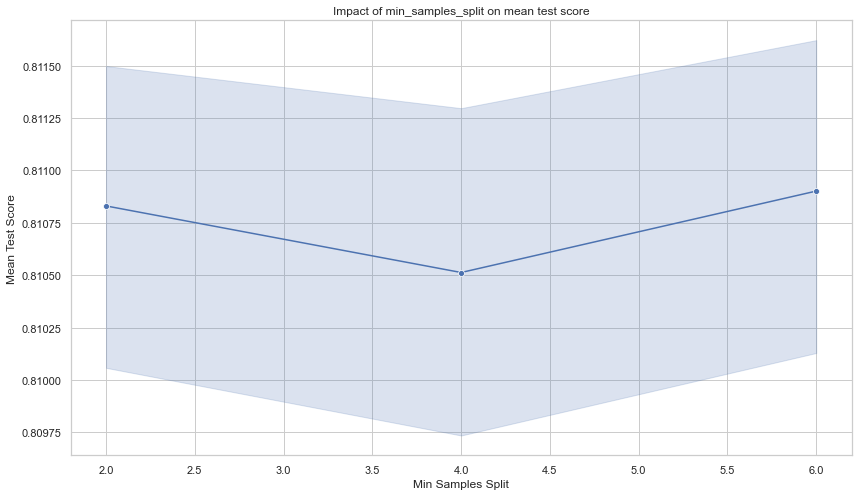

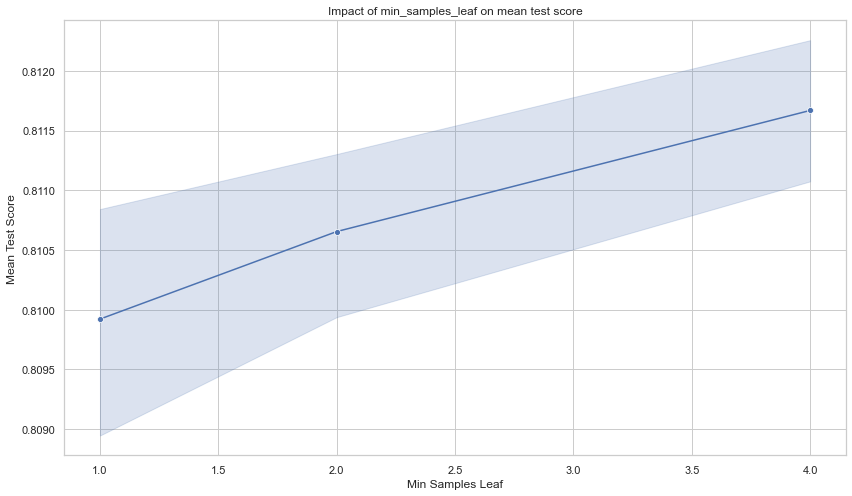

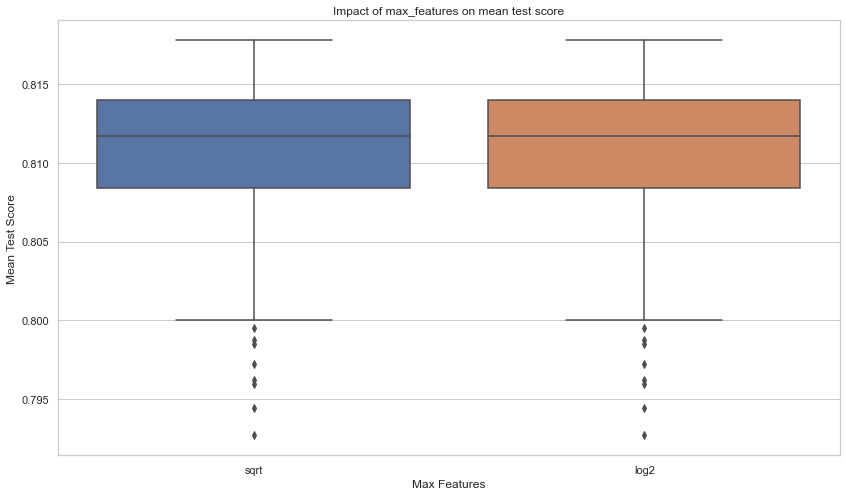

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cv_results = pd.DataFrame(grid_search.cv_results_)

print(cv_results.head())

plt.figure(figsize=(14, 8))

sns.lineplot(data=cv_results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', marker='o')
plt.title('Impact of n_estimators and max_depth on mean test score')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.legend(title='Max Depth')
plt.show()


plt.figure(figsize=(14, 8))

sns.lineplot(data=cv_results, x='param_min_samples_split', y='mean_test_score', marker='o')
plt.title('Impact of min_samples_split on mean test score')
plt.xlabel('Min Samples Split')
plt.ylabel('Mean Test Score')
plt.show()

plt.figure(figsize=(14, 8))

sns.lineplot(data=cv_results, x='param_min_samples_leaf', y='mean_test_score', marker='o')
plt.title('Impact of min_samples_leaf on mean test score')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean Test Score')
plt.show()

plt.figure(figsize=(14, 8))

sns.boxplot(data=cv_results, x='param_max_features', y='mean_test_score')
plt.title('Impact of max_features on mean test score')
plt.xlabel('Max Features')
plt.ylabel('Mean Test Score')
plt.show()


In [19]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [27]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators= 500, max_depth= 10, max_features= 'sqrt', min_samples_leaf=1, min_samples_split=2)
model2.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=500)

In [28]:
predictedRF= model2.predict(X_train_res)
predictedRF3= model2.predict(X_test)

In [29]:
print(model2.score(X_train_res,y_train_res))
print(model2.score(X_test,y_test))

0.922453117080588
0.9073987901349465


In [30]:
F1_score_train2 = metrics.f1_score(y_train_res, predictedRF)
F1_score_test2 = metrics.f1_score(y_test, predictedRF3)
print(F1_score_train2)
print(F1_score_test2)

0.879905808477237
0.7034277198211625


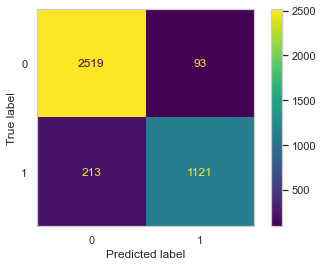

In [31]:
confusion_matrix = metrics.confusion_matrix(y_train_res, predictedRF)
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

fig, ax = plt.subplots()
cm_display2.plot(ax=ax)
ax.grid(False)
plt.show()

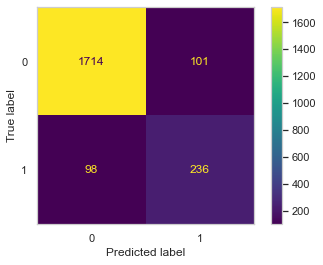

In [32]:
confusion_matrix3 = metrics.confusion_matrix(y_test, predictedRF3)
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [0, 1])

fig, ax = plt.subplots()
cm_display2.plot(ax=ax)
ax.grid(False)
plt.show()

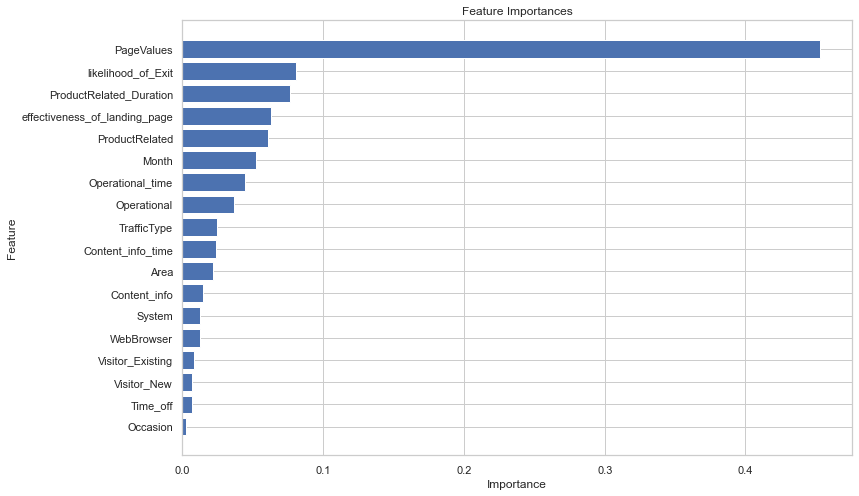

In [33]:
feature_importances = model2.feature_importances_

feature_names = X_train_res.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()



### 1.1 Model 1 description

Briefly describe the model.


### 1.2 Model 2 description

Briefly describe the model.


### 1.3 Why are these models chosen?

What made these models a good choices given the challenge and the data set. You can use the models we learnt in the data set, including ensemble models.


### 1.4 How are the models similar or different to each other in general?

How are the models similar or different,  in terms of. structural similarities, common use cases, complexity,  interpretability etc.





## Section 2: Data preparation:
### 2.1: Dataset description 
### 2.2  How is the data used for training/validation/test purposes?

## Section 2: Model training 


### 2.1 Hyper parameter names, short descriptions,  values used


### 2.2 The impact of using different HP


### 2.3 Final model specifics for model 1 and model 2 and further specifics of the model 

## Section 3: Results and Discussion of the results


### 3.1: Performances and confusion matrices


### 3.2: comparison of the models' outcome and generalization


### 3.3: Reflections: strengths and weaknesses, transparency and reproducibility